In [156]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os


In [2]:
import holoviews as hv
hv.notebook_extension()


In [3]:
BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"
BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta")

In [29]:
BES_Panel["new_eu_split"] = BES_Panel['euRefVoteW10'].astype('object')
BES_Panel["new_eu_split"][ (BES_Panel['euRefDoOverW10']=="Yes")
                         & (BES_Panel['euRefVoteW10']=='Stay/remain in the EU') ]  = "Hard Remain"
BES_Panel["new_eu_split"][ (BES_Panel['euRefDoOverW10']!="Yes")
                         & (BES_Panel['euRefVoteW10']=='Stay/remain in the EU') ]  = "Re-Leave"
BES_Panel["new_eu_split"][ (BES_Panel['euRefDoOverW10']=="No")
                         & (BES_Panel['euRefVoteW10']=='Leave the EU') ]  = "Hard Leave"
BES_Panel["new_eu_split"][ (BES_Panel['euRefDoOverW10']!="No")
                         & (BES_Panel['euRefVoteW10']=='Leave the EU') ]  = "Leave but favour sec. ref"
BES_Panel["new_eu_split"] = BES_Panel["new_eu_split"].astype('category')

C:\ANACON~1\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ANACON~1\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ANACON~1\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ANACON~1\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is tr

In [28]:
BES_Panel["new_eu_split"].value_counts()

Hard Leave                   12127
Hard Remain                  10667
Re-Leave                      4349
Don't know                    1450
I would/will not vote         1118
Leave but favour sec. ref      351
Leave the EU                   257
Name: new_eu_split, dtype: int64

In [16]:
crosstab = pd.crosstab(index   = BES_Panel[ 'euRefVoteW10' ],
                       columns = BES_Panel[ 'euRefDoOverW10' ],
                       values  = BES_Panel[ "wt_full_W10" ],
                       aggfunc = sum,
                       normalize=True)
crosstab

euRefDoOverW10,No,Yes,Don't know
euRefVoteW10,,,
Stay/remain in the EU,0.092438,0.345167,0.048612
Leave the EU,0.402135,0.014854,0.010252
I would/will not vote,0.021888,0.004621,0.009942
Don't know,0.020790,0.007445,0.021855


In [22]:
BES_Panel['euRefFinalW8'].value_counts()

The decision will be final            15760
There might be a second referendum    11318
Don't know                             6424
Name: euRefFinalW8, dtype: int64

In [30]:
crosstab = pd.crosstab(index   = BES_Panel[ 'euRefVoteW8' ],
                       columns = BES_Panel[ 'euRefFinalW8' ],
                       values  = BES_Panel[ "wt_full_W8" ],
                       aggfunc = sum,
                       normalize=True)
100*crosstab

euRefFinalW8,The decision will be final,There might be a second referendum,Don't know
euRefVoteW8,,,
Stay/remain in the EU,21.081095,15.017625,9.339418
Leave the EU,22.991982,17.076721,6.383714
I would/will not vote,0.202659,0.244076,1.076633
Don't know,1.969379,2.010493,2.606205


In [34]:
BES_Remain = BES_Panel[ BES_Panel['euRefVoteW10']== 'Stay/remain in the EU' ]

In [46]:
BES_W10_do_over = BES_Remain['euRefDoOverW10'].cat.reorder_categories(['No', 'Don\'t know', 'Yes' ]).cat.codes

BES_W10_do_over.replace(-1,np.nan,inplace=True)

In [45]:
BES_W8_do_over = BES_Remain['euRefFinalW8'].cat.reorder_categories(['The decision will be final',
                                                   'Don\'t know',
                                                   'There might be a second referendum']).cat.codes
BES_W8_do_over.replace(-1,np.nan,inplace=True)

In [55]:
non_nulls = BES_W8_do_over.notnull() & BES_W10_do_over.notnull()
# nans
BES_W10_do_over[non_nulls].corr(BES_W8_do_over)

0.086376495043205895

In [51]:
BES_Remain[ [ 'euRefDoOverW10', 'euRefFinalW8' ]]

,euRefDoOverW10,euRefFinalW8
6,Yes,There might be a second referendum
8,Yes,The decision will be final
17,Yes,There might be a second referendum
40,Yes,Don't know
45,Yes,There might be a second referendum
48,No,The decision will be final
55,Don't know,The decision will be final
56,Yes,The decision will be final
60,No,The decision will be final
62,Yes,The decision will be final


In [ ]:
# weird -> look correlations!

In [56]:
BES_numeric = pd.read_hdf( BES_data_folder+"BESW8numeric.hdf", "BESW8numeric" )
print("BES_numeric",  BES_numeric.shape )

BES_numeric (31409, 659)


In [57]:
fname = BES_data_folder+"cat_dictionary"+".pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
print("cat_dictionary", len( cat_dictionary ) )

cat_dictionary 650


In [58]:
BES_reduced_with_na = pd.read_hdf(BES_data_folder+"BES_reduced_with_na.hdf","BES_reduced_with_na")
print("BES_reduced_with_na",  BES_reduced_with_na.shape )

BES_reduced_with_na (31409, 454)


In [76]:
BES_Panel[BES_Panel.wave8==1].country.dropna().shape

(27075,)

In [77]:
BES_numeric.country.dropna().shape

(25376,)

In [87]:
BES_Panel[BES_Panel["new_eu_split"]=='Re-Leave'].shape

(4349, 4248)

In [95]:
Re_leave_by_con = BES_Panel[BES_Panel["new_eu_split"]=='Re-Leave'].pcon.replace("",np.nan).value_counts()

In [ ]:
# 1089 - blank!
# 3260 - not blank!

In [96]:
Not_Re_leave_by_con = BES_Panel[BES_Panel["new_eu_split"]!='Re-Leave'].pcon.replace("",np.nan).value_counts()

In [97]:
Re_leave_by_con.shape

(626,)

In [98]:
Not_Re_leave_by_con.shape

(634,)

In [110]:
dict({"Ratio":rat,"Seat":con})

{'Ratio': 0.053846153846153849, 'Seat': 'Edinburgh North and Leith'}

In [127]:
ratio_by_seat = pd.DataFrame(columns = ["Ratio","Seat"])

In [129]:
counter = 0
for con in Not_Re_leave_by_con.index:
    
    if (con in Re_leave_by_con.index):
        rat = Re_leave_by_con[con]/Not_Re_leave_by_con[con]
    else:
        rat = 0
    ratio_by_seat.loc[counter] = [rat,con]
    counter = counter + 1


In [133]:
ratio_by_seat.Ratio = ratio_by_seat.Ratio / ratio_by_seat.Ratio.mean()

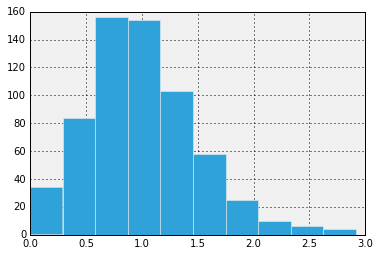

In [157]:
ratio_by_seat["Ratio"].hist()


In [162]:
ratio_by_seat["Ratio"].quantile([0,.2,.4,.6,.8,1.0]).values

array([ 0.        ,  0.61128913,  0.84224666,  1.07994413,  1.38710369,
        2.91584915])

In [161]:
import folium
from IPython.display import HTML

In [167]:
# map = folium.Map(location=[53, 0],zoom_start=6)
# map.choropleth(geo_path='wpc.json', data=ratio_by_seat, columns=['Seat', 'Ratio'],
#              key_on='feature.properties.PCON13NM',threshold_scale=[ 0.0        ,  0.6,  0.84,  1.08,  1.39,
#         3.0],
#              fill_color='OrRd')
# map # embed_map(map)

In [164]:
[x for x in BES_Panel.columns if 'mii' in x]

['miiW1',
 'miiW2',
 'miiW3',
 'miiW4',
 'miiW5',
 'miiW6',
 'miiW7',
 'miieuW7',
 'miiW8',
 'miieuW8',
 'miiW9',
 'miiW10',
 'miilabelcertaintyW1',
 'miilabelcertaintyW4',
 'miilabelcertaintyW3',
 'miilabelcertaintyW2',
 'miilabelcertaintyW5',
 'miilabelcertaintyW6',
 'miilabelW1',
 'miilabelW2',
 'miilabelW3',
 'miilabelW4',
 'miilabelW5',
 'miilabelW6']

In [165]:
BES_Panel['miilabelW5']

0                    nhs
1        economy general
2             Don't know
3                    NaN
4                    NaN
5                    NaN
6              terrorism
7               taxation
8           unemployment
9        economy general
10       economy general
11                   NaN
12                   NaN
13       economy general
14       economy general
15             education
16       economy general
17                   NaN
18                   NaN
19                   NaN
20                   NaN
21                   NaN
22                europe
23       economy general
24                   NaN
25                   NaN
26           immigration
27           immigration
28       economy general
29           immigration
              ...       
64659                NaN
64660                NaN
64661                NaN
64662                NaN
64663                NaN
64664                NaN
64665                NaN
64666                NaN
64667                NaN


In [170]:
Re_leave_by_gor = BES_Panel[BES_Panel["new_eu_split"]=='Re-Leave'].gor.replace("",np.nan).value_counts()

In [183]:
Re_leave_by_gor

Scotland                    503
South East                  363
London                      349
North West                  250
Wales                       218
Yorkshire and the Humber    215
East of England             210
South West                  207
East Midlands               183
West Midlands               179
North East                  104
Northern Ireland              0
Name: gor, dtype: int64

In [173]:
Not_Re_leave_by_gor = BES_Panel[BES_Panel["new_eu_split"]!='Re-Leave'].gor.replace("",np.nan).value_counts()

In [180]:
Not_Re_leave_by_gor.drop("Northern Ireland")

Scotland                    7787
London                      5904
South East                  5749
Wales                       4499
North West                  4307
East of England             3946
Yorkshire and the Humber    3556
South West                  3548
West Midlands               3273
East Midlands               2998
North East                  1832
Name: gor, dtype: int64

In [181]:
ratio = Re_leave_by_gor.drop("Northern Ireland").values/Not_Re_leave_by_gor.drop("Northern Ireland").values
ratio = ratio/ratio.mean()
pd.DataFrame(index = Not_Re_leave_by_gor.drop("Northern Ireland").index,data=ratio)

,0
Scotland,1.115035
London,1.061331
South East,1.047910
Wales,0.959212
North West,0.873720
East of England,0.940529
Yorkshire and the Humber,1.019409
South West,1.007111
West Midlands,0.965152
East Midlands,1.030652


In [191]:
Hard_Remain_by_gor = BES_Panel[BES_Panel["new_eu_split"]=='Hard Remain'].gor.replace("",np.nan).value_counts()

ratio = Re_leave_by_gor.drop("Northern Ireland").values/Hard_Remain_by_gor.drop("Northern Ireland").values
ratio = ratio/ratio.mean()
pd.DataFrame(index = Hard_Remain_by_gor.drop("Northern Ireland").index,columns = ["Re_Leave/HardRemain by region"],data=ratio)

,Re_Leave/HardRemain by region
Scotland,0.954035
London,0.924960
South East,1.049631
North West,0.934775
Wales,0.851683
Yorkshire and the Humber,0.966840
South West,1.037601
East of England,1.035834
West Midlands,1.039606
East Midlands,1.159750


In [187]:
BES_Panel["new_eu_split"].value_counts()

Hard Leave                   12127
Hard Remain                  10667
Re-Leave                      4349
Don't know                    1450
I would/will not vote         1118
Leave but favour sec. ref      608
Name: new_eu_split, dtype: int64

In [192]:
BES_Panel[BES_Panel["new_eu_split"]=='Re-Leave'].pcon.value_counts()

                                             1089
Edinburgh West                                 17
Argyll and Bute                                17
Edinburgh East                                 17
Berwickshire, Roxburgh and Selkirk             17
Dumfries and Galloway                          16
Chipping Barnet                                15
Edinburgh South West                           15
Edinburgh North and Leith                      14
North Ayrshire and Arran                       14
Gordon                                         14
Ross, Skye and Lochaber                        13
Paisley and Renfrewshire South                 13
Kirkcaldy and Cowdenbeath                      13
Falkirk                                        13
Perth and North Perthshire                     12
Glenrothes                                     12
Warwick and Leamington                         12
Streatham                                      12
Inverness, Nairn, Badenoch and Strathspey      11


In [ ]:
#### MOST IMPORTANT ISSUES BY CAMPAIGN DAY ####

In [ ]:
BESCampaignDayW5